# Bank Customer Churn Prediction
Dataset credits: https://www.kaggle.com/kmalit/bank-customer-churn-prediction

Import all the Dependencies

In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv("Churn_Modelling.csv")

In [6]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [8]:
df.drop(['RowNumber','CustomerId','Surname'],axis='columns',inplace=True)

In [12]:
df.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [19]:
tenure_churn_yes = df[df.Exited==1].Tenure
tenure_churn_no  = df[df.Exited==0].Tenure

# Visualizing customer churn by tenure

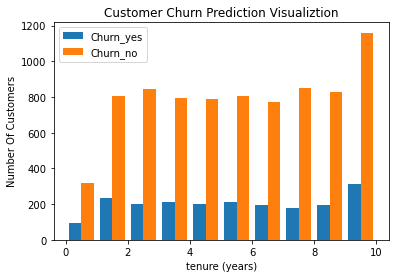

In [42]:
plt.xlabel("tenure (years)")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")
plt.hist([tenure_churn_yes,tenure_churn_no],label=['Churn_yes','Churn_no'])
plt.legend()


In [30]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

In [31]:
print_unique_col_values(df)

Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']


In [32]:
df.replace('Female',0,inplace=True)
df.replace('Male',1,inplace=True)

In [33]:
df1 = pd.get_dummies(data=df, columns=['Geography'])
df1.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')

# Scaling and Train,Test split

In [34]:
cols_to_scale = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts','EstimatedSalary']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale])

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=5)

In [37]:
df1.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,0.538,0,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,1,0,0
1,0.516,0,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0,0,1
2,0.304,0,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,1,0,0
3,0.698,0,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,1,0,0
4,1.000,0,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,0,0,1


In [40]:
X = df1.drop('Exited',axis='columns')
Y = df1['Exited']

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=5)

In [44]:
X_train.shape , X_test.shape

((8000, 12), (2000, 12))

# Build a model (ANN) in tensorflow/keras

In [52]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(12,), activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=80)

Epoch 1/80
250/250 [==============================] - 1s 2ms/step - loss: 0.5066 - accuracy: 0.7943
Epoch 2/80
250/250 [==============================] - 0s 2ms/step - loss: 0.4720 - accuracy: 0.7970
Epoch 3/80
250/250 [==============================] - 0s 2ms/step - loss: 0.4568 - accuracy: 0.8052
Epoch 4/80
250/250 [==============================] - 0s 2ms/step - loss: 0.4460 - accuracy: 0.8126
Epoch 5/80
250/250 [==============================] - 0s 2ms/step - loss: 0.4377 - accuracy: 0.8140
Epoch 6/80
250/250 [==============================] - 0s 1ms/step - loss: 0.4339 - accuracy: 0.8117
Epoch 7/80
250/250 [==============================] - 0s 2ms/step - loss: 0.4319 - accuracy: 0.8138
Epoch 8/80
250/250 [==============================] - 0s 2ms/step - loss: 0.4305 - accuracy: 0.8159
Epoch 9/80
250/250 [==============================] - 0s 2ms/step - loss: 0.4281 - accuracy: 0.8155
Epoch 10/80
250/250 [==============================] - 1s 2ms/step - loss: 0.4260 - accuracy: 0.8164

In [53]:
model.evaluate(X_test, Y_test)

63/63 [==============================] - 0s 1ms/step - loss: 0.3559 - accuracy: 0.8525


[0.35589805245399475, 0.8525000214576721]

#  You can see above that we get 85.25% accuracy for our test dataset.